# **Machine Learning Techniques Project**


*   Nicolas Bedoya Figueroa
*   Daniel Escalante Perez
*   Marilyn Stephany Joven Fonseca
*   Eder Leandro Carbonero Baquero

## **Utils**

In [1]:
!pip install nltk pyspellchecker tqdm emoji nlpaug transformers tensorflow xgboost[gpu] accelerate

In [2]:
!pip install seaborn transformers torch tqdm 

In [3]:
!pip install umap-learn plotly

In [4]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from spellchecker import SpellChecker
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tqdm import tqdm
import nlpaug.augmenter.word as naw
from nlpaug.util import Action
import emoji
import random
import math
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')

2025-05-16 00:53:46.071624: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-16 00:53:46.078848: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747374826.087083    3072 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747374826.089607    3072 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747374826.096162    3072 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

True

Librerias ML y DL

In [5]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torch.optim import Adam
from transformers import AutoTokenizer, AutoModel
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
import umap
import plotly.express as px
import ast
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import warnings
import random
from sklearn.metrics.pairwise import cosine_similarity


In [6]:
random_seed = 611
torch.manual_seed(random_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(random_seed)

## **Machine Learning Models**

### **XGBClassifier**

In [7]:
# Loading the embedded data

data = pd.read_csv("./embeddings_data.csv")

In [8]:
data.shape

(47690, 4)

In [9]:
# Splitting the characteristics and label

X = np.vstack([np.array(ast.literal_eval(vec), dtype=float) for vec in data["embedding_cls"]])
y = data["class"].values

In [10]:
# Splitting the train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=611, shuffle = True)

In [11]:
X_train.shape

(38152, 768)

In [12]:
# Parameter exploration grid
param_grid = {
    "n_estimators": [450, 500, 550],
    "max_depth": [10, 20, 50],
    "min_child_weight": [10, 5, 2]
}

# Grid search configuration
characteristics = math.sqrt(X_train.shape[1]) / X_train.shape[1]
model = XGBClassifier(tree_method="hist", device="cuda", subsample = 0.8, colsample_bytree = characteristics, colsample_bynode = characteristics)
grid_search = GridSearchCV(model, param_grid, scoring = "accuracy", n_jobs = 2, cv = 3, verbose = 3, return_train_score = True)

In [36]:
# Train the model and search for the hyperparameters with 50% of the whole set, theres no enough GPU memory for the whole training set
grid_search.fit(X_train[:25000], y_train[:25000])

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/home/sis.virtual.uniandes.edu.co/d.escalante/venv/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [15:48:07] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/home/sis.virtual.uniandes.edu.co/d.escalante/venv/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [15:48:07] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure tha

[CV 1/3] END max_depth=19, min_child_weight=2, n_estimators=490;, score=(train=1.000, test=0.855) total time=  47.1s
[CV 3/3] END max_depth=19, min_child_weight=2, n_estimators=490;, score=(train=1.000, test=0.848) total time=  45.7s
[CV 2/3] END max_depth=19, min_child_weight=2, n_estimators=500;, score=(train=1.000, test=0.847) total time=  45.0s


/home/sis.virtual.uniandes.edu.co/d.escalante/venv/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 2/3] END max_depth=19, min_child_weight=2, n_estimators=490;, score=(train=1.000, test=0.847) total time=  47.2s
[CV 1/3] END max_depth=19, min_child_weight=2, n_estimators=500;, score=(train=1.000, test=0.854) total time=  46.7s
[CV 3/3] END max_depth=19, min_child_weight=2, n_estimators=500;, score=(train=1.000, test=0.847) total time=  44.9s


/home/sis.virtual.uniandes.edu.co/d.escalante/venv/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [15:50:19] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/home/sis.virtual.uniandes.edu.co/d.escalante/venv/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [15:50:27] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure tha

[CV 1/3] END max_depth=19, min_child_weight=2, n_estimators=510;, score=(train=1.000, test=0.855) total time=  40.3s
[CV 3/3] END max_depth=19, min_child_weight=2, n_estimators=510;, score=(train=1.000, test=0.848) total time=  44.1s
[CV 2/3] END max_depth=20, min_child_weight=2, n_estimators=490;, score=(train=1.000, test=0.847) total time=  45.1s
[CV 2/3] END max_depth=19, min_child_weight=2, n_estimators=510;, score=(train=1.000, test=0.847) total time=  47.3s
[CV 1/3] END max_depth=20, min_child_weight=2, n_estimators=490;, score=(train=1.000, test=0.855) total time=  46.7s
[CV 3/3] END max_depth=20, min_child_weight=2, n_estimators=490;, score=(train=1.000, test=0.853) total time=  44.0s


/home/sis.virtual.uniandes.edu.co/d.escalante/venv/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [15:52:29] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/home/sis.virtual.uniandes.edu.co/d.escalante/venv/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [15:52:45] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure tha

[CV 1/3] END max_depth=20, min_child_weight=2, n_estimators=500;, score=(train=1.000, test=0.856) total time=  40.5s
[CV 3/3] END max_depth=20, min_child_weight=2, n_estimators=500;, score=(train=1.000, test=0.853) total time=  45.1s
[CV 2/3] END max_depth=20, min_child_weight=2, n_estimators=510;, score=(train=1.000, test=0.847) total time=  46.1s
[CV 2/3] END max_depth=20, min_child_weight=2, n_estimators=500;, score=(train=1.000, test=0.847) total time=  46.5s
[CV 1/3] END max_depth=20, min_child_weight=2, n_estimators=510;, score=(train=1.000, test=0.855) total time=  46.8s
[CV 3/3] END max_depth=20, min_child_weight=2, n_estimators=510;, score=(train=1.000, test=0.854) total time=  43.9s


/home/sis.virtual.uniandes.edu.co/d.escalante/venv/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [15:54:42] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/home/sis.virtual.uniandes.edu.co/d.escalante/venv/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [15:55:02] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure tha

[CV 1/3] END max_depth=21, min_child_weight=2, n_estimators=490;, score=(train=1.000, test=0.857) total time=  41.2s
[CV 3/3] END max_depth=21, min_child_weight=2, n_estimators=490;, score=(train=1.000, test=0.847) total time=  45.5s
[CV 2/3] END max_depth=21, min_child_weight=2, n_estimators=500;, score=(train=1.000, test=0.852) total time=  45.9s
[CV 2/3] END max_depth=21, min_child_weight=2, n_estimators=490;, score=(train=1.000, test=0.850) total time=  45.9s
[CV 1/3] END max_depth=21, min_child_weight=2, n_estimators=500;, score=(train=1.000, test=0.857) total time=  46.0s
[CV 3/3] END max_depth=21, min_child_weight=2, n_estimators=500;, score=(train=1.000, test=0.846) total time=  43.6s


/home/sis.virtual.uniandes.edu.co/d.escalante/venv/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [15:56:57] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/home/sis.virtual.uniandes.edu.co/d.escalante/venv/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [15:57:19] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure tha

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=0.03608439182435161,
                                     colsample_bytree=0.03608439182435161,
                                     device='cuda', early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=2,
             param_grid={'max_depth': [19, 20, 21], 'min_child_weight': [2],
                         'n_estimators': [490, 500, 510]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [37]:
grid_search.best_params_

{'max_depth': 20, 'min_child_weight': 2, 'n_estimators': 500}

In [38]:
grid_search.best_score_

np.float64(0.8518798299328182)

In [13]:
# Creation of the final model
model = XGBClassifier(tree_method="hist", device="cuda", subsample = 0.8, colsample_bytree = characteristics, colsample_bynode = characteristics, n_estimators = 500, max_depth = 20, min_child_weight = 20)

In [14]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=0.03608439182435161,
              colsample_bytree=0.03608439182435161, device='cuda',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=20, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4626
           1       0.89      0.83      0.86      4912

    accuracy                           0.86      9538
   macro avg       0.86      0.86      0.86      9538
weighted avg       0.86      0.86      0.86      9538



/home/sis.virtual.uniandes.edu.co/d.escalante/venv/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [21:15:47] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


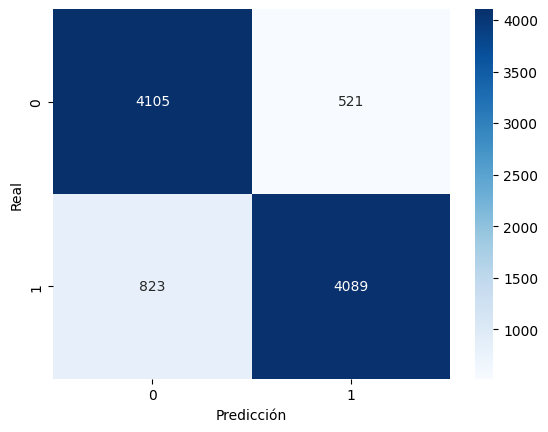

In [15]:
# Evaluation of the model

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, xticklabels = ["0", "1"], yticklabels = ["0", "1"], annot=True, cmap='Blues', fmt = 'g')
plt.ylabel("Real")
plt.xlabel("Predicción")
plt.show()


## **Deep Learning Models**

### **Daniel Escalante Perez**

#### **Utils**

In [7]:
# Function for measuring the accuracy

def get_accuracy(output, y, train_size):
    pred = torch.sigmoid(output) > 0.5  # Thresholding
    correct = pred.eq(y.bool()).sum().item()
    return correct / train_size

In [8]:
# Training function

def train(train_loader, optimizer, loss_function, model_train):
    loss = 0
    accuracy = 0
    batch_num = 0
    model_train.train()
    for x, y in train_loader:
        batch_num += 1
        output = model_train(x)
        optimizer.zero_grad()
        batch_loss = loss_function(output, y)
        batch_loss.backward()
        optimizer.step()

        loss += batch_loss.item()
        accuracy += get_accuracy(output, y, len(train_loader.dataset))
    print(f"Train Loss: {round(loss/batch_num, 5)}, Train Accuracy: {round(accuracy, 5)}")

    return loss/batch_num, accuracy

In [9]:
# Validation function

def validate(val_loader, loss_function, model_val):

    loss = 0
    accuracy = 0
    batch_num = 0

    model_val.eval()
    with torch.no_grad():
        for x, y in val_loader:
            batch_num += 1
            output = model_val(x)
            batch_loss = loss_function(output, y)

            loss += batch_loss.item()
            accuracy += get_accuracy(output, y, len(val_loader.dataset))
    print(f"Validation Loss: {round(loss/batch_num, 5)}, Validation Accuracy: {round(accuracy, 5)}")
    return loss/batch_num, accuracy

In [10]:
# Saving the best model

def save_checkpoint(model_save):
    torch.save(model_save.state_dict(), "best_model.pth")
    

In [11]:
# Loading the best model

def load_checkpoint(model_load):
    checkpoint = torch.load("best_model.pth", map_location=device)
    checkpoint = { k.replace("_orig_mod.", ""): v for k, v in checkpoint.items() }
    model_load.load_state_dict(checkpoint)
    model_load = torch.compile(model_load.to(device), backend="eager")
    model_load.eval()
    return model_load
    

In [12]:
# Loss and accuracy graphing

def loss_accuracy_graph(loss_accuracy_list):
    epochs = len(loss_accuracy_list)
    train_loss = [loss_accuracy_list[i][0] for i in range(epochs)]
    train_accuracy = [loss_accuracy_list[i][1] for i in range(epochs)]
    val_loss = [loss_accuracy_list[i][2] for i in range(epochs)]
    val_accuracy = [loss_accuracy_list[i][3] for i in range(epochs)]

    plt.plot(range(1, epochs + 1), train_loss, 'r-', label = "Training")
    plt.plot(range(1, epochs + 1), val_loss, 'b-', label = "Validation")
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train and Validation Loss')
    plt.show()

    plt.plot(range(1, epochs + 1), train_accuracy, 'r-', label = "Training")
    plt.plot(range(1, epochs + 1), val_accuracy, 'b-', label = "Validation")
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train and Validation Accuracy')
    plt.show()
    

In [13]:
# Training loop

def training_loop(epochs, train_loader, val_loader, optimizer, loss_function, model_train_loop):
    max_accuracy = float("-inf")
    loss_accuracy_list = []

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")
        train_loss, train_accuracy = train(train_loader, optimizer, loss_function, model_train_loop)
        current_loss, val_accuracy = validate(val_loader, loss_function, model_train_loop)
        loss_accuracy_list.append((train_loss, train_accuracy, current_loss, val_accuracy))
        if val_accuracy > max_accuracy:
            max_accuracy = val_accuracy
            save_checkpoint(model_train_loop)
            print("Model saved!")
        else:
            print("Model not saved!")
    
    loss_accuracy_graph(loss_accuracy_list)

In [14]:
# Model evaluation

def evaluate_model(model_load, X_test, y_test):
    model_eval = load_checkpoint(model_load)

    with torch.no_grad():
        y_pred = model_eval(torch.tensor(X_test).float().to(device))

    pred = torch.sigmoid(y_pred).cpu().numpy() > 0.5

    print(classification_report(y_test, pred))

    conf_matrix = confusion_matrix(y_test, pred)

    sns.heatmap(conf_matrix, xticklabels = ["0", "1"], yticklabels = ["0", "1"], annot=True, cmap='Blues', fmt = 'g')
    plt.ylabel("Real")
    plt.xlabel("Predicción")
    plt.show()

#### **BI-LSTM**

In [15]:
# Check GPU availability

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

True

In [16]:
# Embedding loading
X = np.load("./embeddings_data_sequencial.npy")
X.shape

(47696, 32, 768)

In [17]:
# Labels loading
data = pd.read_csv("./balanced_data.csv")
y = data["class"].values
y.shape

(47696,)

In [18]:
# Shuffling the dataset

permutation = np.random.permutation(len(y))
y = y[permutation].reshape(-1, 1)
X = X[permutation]

In [19]:
# Calculation of the set distribution

test_size = int(y.shape[0] * 0.15)
val_size = int(y.shape[0] * 0.15)
train_size = int(y.shape[0] * 0.7)

In [20]:
# Set definition

X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]

X_test = X[train_size + val_size : ]
y_test = y[train_size + val_size : ]

In [21]:
# Custom layer that takes the last hidden state of the sequences

class Modifier(nn.Module):
    def __init__(self):
        super().__init__()
    

    def forward(self, x):
        output = x[:,-1,:]
        
        return output

In [22]:
# Custom dataset class

class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.xs = torch.tensor(x).float().to(device)
        self.ys = torch.tensor(y).float().to(device)

    def __getitem__(self, idx):
        x = self.xs[idx]
        y = self.ys[idx]
        return x, y

    def __len__(self):
        return len(self.xs)

In [23]:
# Creation of the custom training and validation datasets

train_data = CustomDataset(X_train, y_train)
val_data = CustomDataset(X_val, y_val)

In [24]:
# Creation of the dataloaders

train_loader = DataLoader(train_data, batch_size = 32, shuffle = True)
val_loader = DataLoader(val_data, batch_size = 32, shuffle = True)

In [25]:
# Loader testing

x_batch, y_batch = next(iter(train_loader))
x_batch.shape

torch.Size([32, 32, 768])

In [26]:
# Custom layer that takes the last hidden state of the sequences

class Modifier(nn.Module):
    def __init__(self):
        super().__init__()
    

    def forward(self, x):
        output = x[:,-1,:]
        
        return output

In [27]:
# Model architecture definition

class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size = 768, hidden_size = 256, num_layers = 1, batch_first = True, bidirectional=True)
        self.dropout = nn.Dropout(p = 0.3)
        self.lstm2 = nn.LSTM(input_size = 512, hidden_size = 128, num_layers = 1, batch_first = True, bidirectional=True)
        self.modifier = Modifier()
        self.dropout2 = nn.Dropout(p = 0.3)
        
        self.linear = nn.Linear(256, 64)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(64, 1)
        

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        x = self.dropout(lstm_out)
        lstm_out, _ = self.lstm2(x)
        x = self.modifier(lstm_out)
        x = self.dropout2(x)
        
        x = self.linear(x)
        x = self.relu(x)
        x = self.linear2(x)
        
        return x

model = CustomModel()

In [28]:
# Model compilation

model = torch.compile(model.to(device), backend="eager")
model

OptimizedModule(
  (_orig_mod): CustomModel(
    (lstm): LSTM(768, 256, batch_first=True, bidirectional=True)
    (dropout): Dropout(p=0.3, inplace=False)
    (lstm2): LSTM(512, 128, batch_first=True, bidirectional=True)
    (modifier): Modifier()
    (dropout2): Dropout(p=0.3, inplace=False)
    (linear): Linear(in_features=256, out_features=64, bias=True)
    (relu): ReLU()
    (linear2): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [29]:
# Loss and optimizer definition

loss_function = nn.BCEWithLogitsLoss()
optimizer = Adam(model.parameters())
model = model.to(device)

Epoch 1/200
Train Loss: 0.35935, Train Accuracy: 0.84341
Validation Loss: 0.30861, Validation Accuracy: 0.87252
Model saved!
Epoch 2/200
Train Loss: 0.29725, Train Accuracy: 0.87288
Validation Loss: 0.29606, Validation Accuracy: 0.87126
Model not saved!
Epoch 3/200
Train Loss: 0.27212, Train Accuracy: 0.88534
Validation Loss: 0.27715, Validation Accuracy: 0.88286
Model saved!
Epoch 4/200
Train Loss: 0.24642, Train Accuracy: 0.89822
Validation Loss: 0.2637, Validation Accuracy: 0.89069
Model saved!
Epoch 5/200
Train Loss: 0.21778, Train Accuracy: 0.91128
Validation Loss: 0.27756, Validation Accuracy: 0.88426
Model not saved!
Epoch 6/200
Train Loss: 0.18451, Train Accuracy: 0.92602
Validation Loss: 0.27377, Validation Accuracy: 0.88762
Model not saved!
Epoch 7/200
Train Loss: 0.14808, Train Accuracy: 0.94279
Validation Loss: 0.31842, Validation Accuracy: 0.88957
Model not saved!
Epoch 8/200
Train Loss: 0.1152, Train Accuracy: 0.9566
Validation Loss: 0.32697, Validation Accuracy: 0.88216


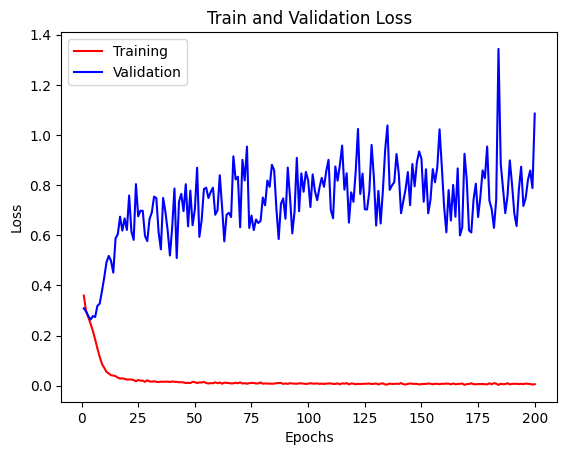

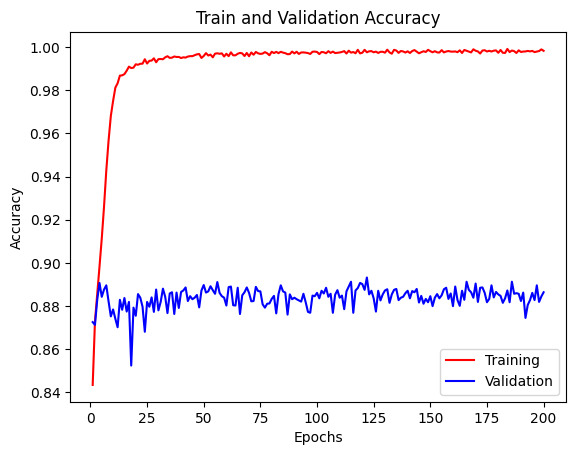

In [30]:
training_loop(200, train_loader, val_loader, optimizer, loss_function, model)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      3517
           1       0.92      0.86      0.89      3638

    accuracy                           0.89      7155
   macro avg       0.89      0.89      0.89      7155
weighted avg       0.89      0.89      0.89      7155



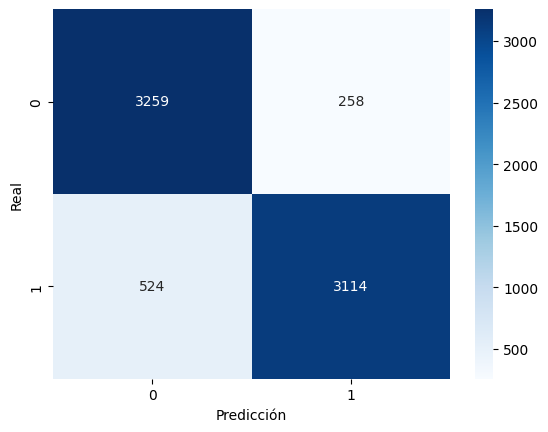

In [34]:
model_load = CustomModel()
evaluate_model(model_load, X_test, y_test)

#### **roBERTa Fine tunning with a dense classification head**

##### **Utils**

In [15]:
# Training function

def train(train_loader, optimizer, loss_function, model_train):
    loss = 0
    accuracy = 0
    batch_num = 0
    model_train.train()
    for batch in train_loader:
        batch_num += 1
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        y = batch["label"].to(device).float()
        output = model_train(input_ids, attention_mask)
        optimizer.zero_grad()
        batch_loss = loss_function(output, y)
        batch_loss.backward()
        optimizer.step()

        loss += batch_loss.item()
        accuracy += get_accuracy(output, y, len(train_loader.dataset))
    print(f"Train Loss: {round(loss/batch_num, 5)}, Train Accuracy: {round(accuracy, 5)}")

    return loss/batch_num, accuracy

In [16]:
# Validation function

def validate(val_loader, loss_function, model_val):

    loss = 0
    accuracy = 0
    batch_num = 0

    model_val.eval()
    with torch.no_grad():
        for batch in val_loader:
            batch_num += 1
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            y = batch["label"].to(device).float()
            output = model_val(input_ids, attention_mask)
            batch_loss = loss_function(output, y)

            loss += batch_loss.item()
            accuracy += get_accuracy(output, y, len(val_loader.dataset))
    print(f"Validation Loss: {round(loss/batch_num, 5)}, Validation Accuracy: {round(accuracy, 5)}")
    return loss/batch_num, accuracy

In [17]:
# Model evaluation

def evaluate_model(model_load, test_loader):
    model_eval = load_checkpoint(model_load)
    batch = next(iter(test_loader))
    input_ids = batch["input_ids"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    y = batch["label"].cpu().float().numpy()

    with torch.no_grad():
        y_pred = model_eval(input_ids, attention_mask)
    
    pred = torch.sigmoid(y_pred).cpu().numpy() > 0.5
    
    print(classification_report(y, pred))

    conf_matrix = confusion_matrix(y, pred)

    sns.heatmap(conf_matrix, xticklabels = ["0", "1"], yticklabels = ["0", "1"], annot=True, cmap='Blues', fmt = 'g')
    plt.ylabel("Real")
    plt.xlabel("Predicción")
    plt.show()

In [18]:
# Model evaluation without loading

def evaluate_model_no_load(model_eval, test_loader):
    batch = next(iter(test_loader))
    input_ids = batch["input_ids"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    y = batch["label"].cpu().float().numpy()
    model_eval.eval()
    with torch.no_grad():
        y_pred = model_eval(input_ids, attention_mask)
    
    pred = torch.sigmoid(y_pred).cpu().numpy() > 0.5
    
    print(classification_report(y, pred))

    conf_matrix = confusion_matrix(y, pred)

    sns.heatmap(conf_matrix, xticklabels = ["0", "1"], yticklabels = ["0", "1"], annot=True, cmap='Blues', fmt = 'g')
    plt.ylabel("Real")
    plt.xlabel("Predicción")
    plt.show()

In [19]:
# Training loop

def training_loop(epochs, train_loader, val_loader, optimizer, loss_function, model_train_loop):
    max_accuracy = 0
    loss_accuracy_list = []

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")
        train_loss, train_accuracy = train(train_loader, optimizer, loss_function, model_train_loop)
        current_loss, val_accuracy = validate(val_loader, loss_function, model_train_loop)
        loss_accuracy_list.append((train_loss, train_accuracy, current_loss, val_accuracy))
        if max_accuracy < val_accuracy:
            max_accuracy = val_accuracy
            save_checkpoint(model_train_loop)
            print("Model saved!")
        else:
            print("Model not saved!")
    
    loss_accuracy_graph(loss_accuracy_list)

##### **Implementation**

In [20]:
# Setting the device to use GPU

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

True

In [21]:
# Loading the data

data = pd.read_csv('balanced_data.csv')
X = data['tweet'].astype(str).values
y = data['class'].values

In [22]:
# Shuffling the dataset

permutation = np.random.permutation(len(y))
y = y[permutation].reshape(-1, 1)
X = X[permutation].tolist()

In [23]:
# Calculation of the set distribution

test_size = int(y.shape[0] * 0.15)
val_size = int(y.shape[0] * 0.15)
train_size = int(y.shape[0] * 0.7)

In [24]:
# Set definition

X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]

X_test = X[train_size + val_size : ]
y_test = y[train_size + val_size : ]

In [25]:
# Custom dataset class

class CustomDatasetText(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            self.texts[idx],
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt"
        )
        return  {
            "input_ids": encoding["input_ids"].squeeze(0),         # shape: (seq_len)
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "label": torch.tensor(label, dtype=torch.long)
        }

    def __len__(self):
        return len(self.texts)

In [26]:
# Tokenizer and dataset definitions

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base")
train_set = CustomDatasetText(X_train, y_train, tokenizer, 32)
val_set = CustomDatasetText(X_val, y_val, tokenizer, 32)
test_set = CustomDatasetText(X_test, y_test, tokenizer, 32)

In [27]:
# Creation of the dataloaders

train_loader = DataLoader(train_set, batch_size = 32, shuffle = True)
val_loader = DataLoader(val_set, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_set, batch_size = len(test_set), shuffle = False)

In [28]:
# BERT layer in our custom fine-tuned model

class BERTLayer(nn.Module):
    def __init__(self, model_name):
        super().__init__()
        self.roberta = AutoModel.from_pretrained(model_name)
        for param in self.roberta.parameters():
            param.requires_grad = False

    def activate_grad(self):
        for param in self.roberta.parameters():
            param.requires_grad = True

    def deactivate_grad(self):
        for param in self.roberta.parameters():
            param.requires_grad = False

    def forward(self,input_ids, attention_mask):
        outputs = self.roberta(input_ids= input_ids, attention_mask= attention_mask)
        return outputs.last_hidden_state[:,0,:]

In [29]:
# Model architecture definition

class ClassificationHead(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(768, 256)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p = 0.3)
        self.linear2 = nn.Linear(256, 32)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p = 0.2)
        self.linear3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.linear(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.linear2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.linear3(x)
        
        return x


In [30]:
# Custom model definition

class CustomModel(nn.Module):
    def __init__(self, model_name):
        super().__init__()
        self.bert = BERTLayer(model_name)
        self.head = ClassificationHead()

    def forward(self, input_ids, attention_mask):
        x = self.bert(input_ids, attention_mask)
        x = self.head(x)
        return x

In [31]:
# Model instanciation

model_name = "cardiffnlp/twitter-roberta-base"
model = CustomModel(model_name)
model = torch.compile(model.to(device), backend="eager")
model

OptimizedModule(
  (_orig_mod): CustomModel(
    (bert): BERTLayer(
      (roberta): RobertaModel(
        (embeddings): RobertaEmbeddings(
          (word_embeddings): Embedding(50265, 768, padding_idx=1)
          (position_embeddings): Embedding(514, 768, padding_idx=1)
          (token_type_embeddings): Embedding(1, 768)
          (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (encoder): RobertaEncoder(
          (layer): ModuleList(
            (0-11): 12 x RobertaLayer(
              (attention): RobertaAttention(
                (self): RobertaSdpaSelfAttention(
                  (query): Linear(in_features=768, out_features=768, bias=True)
                  (key): Linear(in_features=768, out_features=768, bias=True)
                  (value): Linear(in_features=768, out_features=768, bias=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
                (out

In [32]:
# Loss and optimizer definition

loss_function = nn.BCEWithLogitsLoss()
optimizer = Adam(model.parameters())
model = model.to(device)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      3523
         1.0       0.51      1.00      0.67      3632

    accuracy                           0.51      7155
   macro avg       0.25      0.50      0.34      7155
weighted avg       0.26      0.51      0.34      7155



/home/sis.virtual.uniandes.edu.co/d.escalante/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sis.virtual.uniandes.edu.co/d.escalante/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sis.virtual.uniandes.edu.co/d.escalante/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

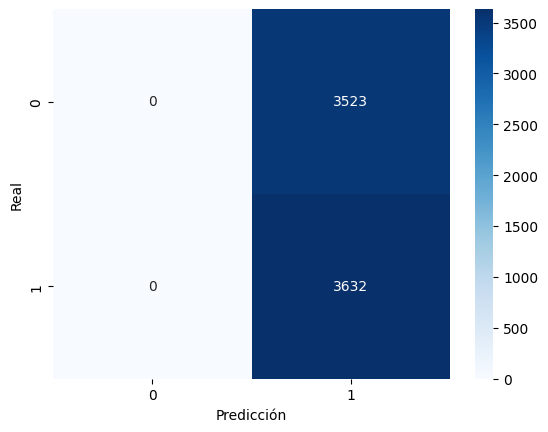

In [33]:
evaluate_model_no_load(model, test_loader)

Epoch 1/150
Train Loss: 0.41102, Train Accuracy: 0.82182
Validation Loss: 0.33935, Validation Accuracy: 0.85225
Model saved!
Epoch 2/150
Train Loss: 0.36752, Train Accuracy: 0.83895
Validation Loss: 0.33807, Validation Accuracy: 0.85491
Model saved!
Epoch 3/150
Train Loss: 0.36043, Train Accuracy: 0.84356
Validation Loss: 0.32414, Validation Accuracy: 0.85784
Model saved!
Epoch 4/150
Train Loss: 0.35687, Train Accuracy: 0.8444
Validation Loss: 0.34337, Validation Accuracy: 0.85421
Model not saved!
Epoch 5/150
Train Loss: 0.35275, Train Accuracy: 0.84614
Validation Loss: 0.32461, Validation Accuracy: 0.86064
Model saved!
Epoch 6/150
Train Loss: 0.35411, Train Accuracy: 0.84512
Validation Loss: 0.32691, Validation Accuracy: 0.86022
Model not saved!
Epoch 7/150
Train Loss: 0.35131, Train Accuracy: 0.8468
Validation Loss: 0.32337, Validation Accuracy: 0.85994
Model not saved!
Epoch 8/150
Train Loss: 0.34878, Train Accuracy: 0.84713
Validation Loss: 0.32337, Validation Accuracy: 0.86092
Mod

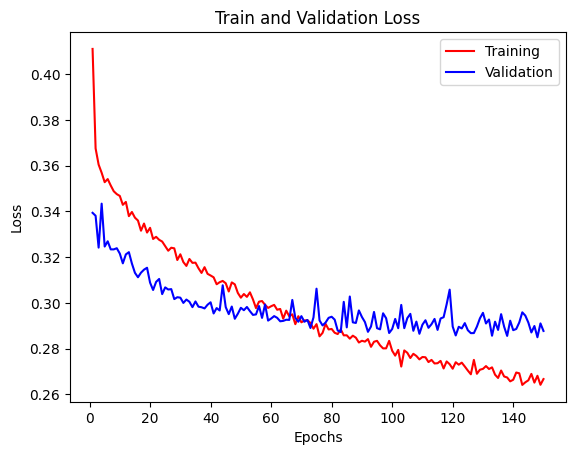

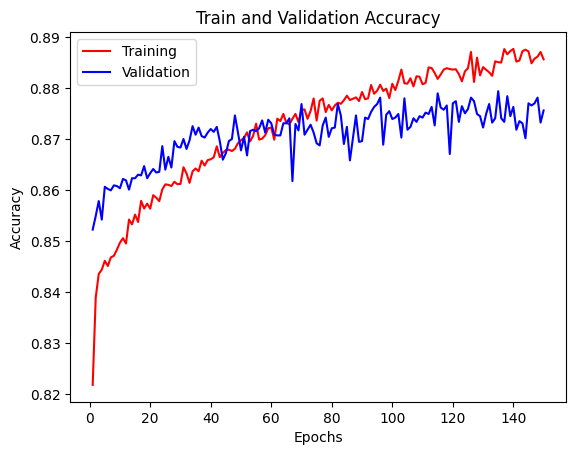

In [33]:
training_loop(150, train_loader, val_loader, optimizer, loss_function, model)

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      3462
         1.0       0.91      0.84      0.88      3693

    accuracy                           0.88      7155
   macro avg       0.88      0.88      0.88      7155
weighted avg       0.88      0.88      0.88      7155



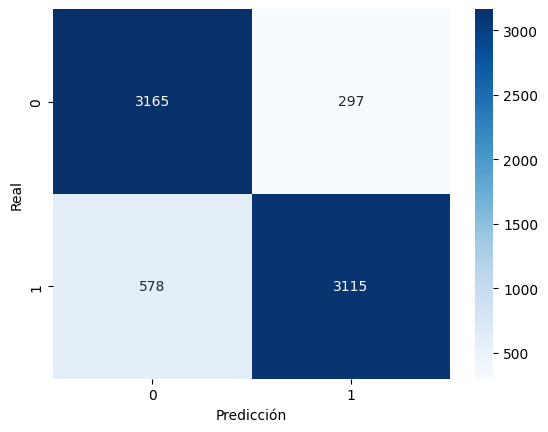

In [34]:
model_load = CustomModel(model_name)
evaluate_model(model_load, test_loader)

In [35]:
# Unfreezing the model's weights

model_load.bert.activate_grad()
optimizer = Adam(model_load.parameters(), lr=.000001)

Epoch 1/100
Train Loss: 0.24712, Train Accuracy: 0.89508
Validation Loss: 0.27791, Validation Accuracy: 0.88426
Model saved!
Epoch 2/100
Train Loss: 0.23142, Train Accuracy: 0.90218
Validation Loss: 0.2777, Validation Accuracy: 0.88314
Model not saved!
Epoch 3/100
Train Loss: 0.222, Train Accuracy: 0.90574
Validation Loss: 0.27488, Validation Accuracy: 0.88482
Model saved!
Epoch 4/100
Train Loss: 0.21605, Train Accuracy: 0.9091
Validation Loss: 0.26872, Validation Accuracy: 0.88901
Model saved!
Epoch 5/100
Train Loss: 0.20904, Train Accuracy: 0.91281
Validation Loss: 0.27272, Validation Accuracy: 0.88566
Model not saved!
Epoch 6/100
Train Loss: 0.20519, Train Accuracy: 0.91269
Validation Loss: 0.26856, Validation Accuracy: 0.89083
Model saved!
Epoch 7/100
Train Loss: 0.19513, Train Accuracy: 0.91754
Validation Loss: 0.26829, Validation Accuracy: 0.88831
Model not saved!
Epoch 8/100
Train Loss: 0.19367, Train Accuracy: 0.91949
Validation Loss: 0.26723, Validation Accuracy: 0.89265
Model

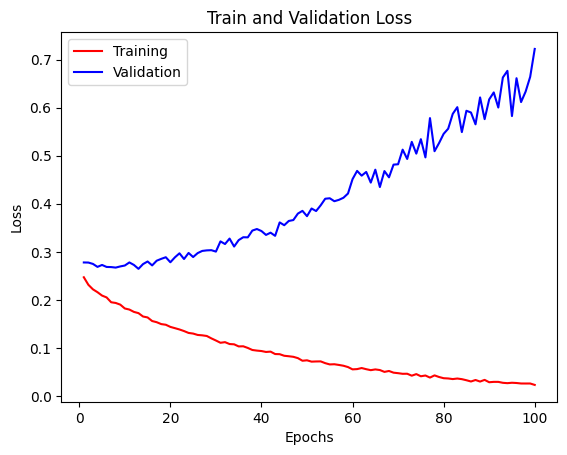

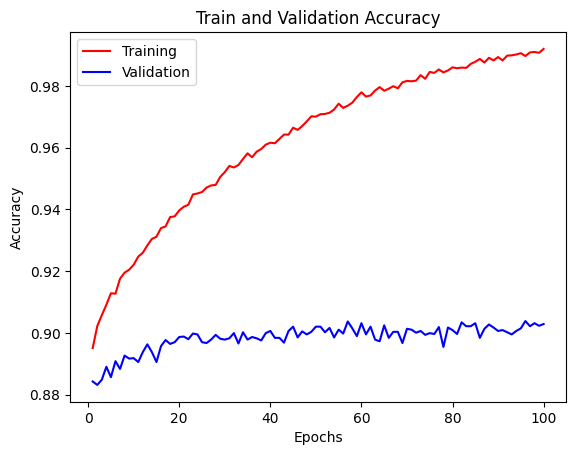

In [36]:
training_loop(100, train_loader, val_loader, optimizer, loss_function, model_load)

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      3462
         1.0       0.93      0.88      0.91      3693

    accuracy                           0.90      7155
   macro avg       0.91      0.91      0.90      7155
weighted avg       0.91      0.90      0.90      7155



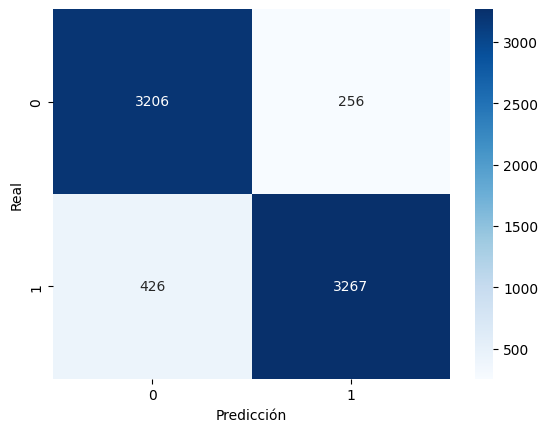

In [37]:
model_load = CustomModel(model_name)
evaluate_model(model_load, test_loader)